# Methodology

In [108]:
class DoublyLinkedNode:
    def __init__(self, nxt, prv, data):
        self.nxt = nxt
        self.prv = prv
        self.data = data
        
    def _recursive_access(self, index):
        if index == 0:
            return self
        return self.nxt._recursive_access(index - 1)
        
class DoublyLinkedList:
    def __init__(self, first_node, last_node):
        self.first_node = first_node
        self.last_node = last_node
        
    def append(self, value):
        new_node = DoublyLinkedNode(None, self.last_node, value)
        if self.last_node:
            self.last_node.nxt = new_node
            self.last_node = new_node
        else:
            self.last_node = self.first_node = new_node
            
        
    def prepend(self, value):
        new_node = DoublyLinkedNode(self.first_node, None, value)
        if self.first_node:
            self.first_node.prv = new_node
            self.first_node = new_node
        else:
            self.first_node = self.last_node = new_node 
            
            
    def looped_access(self, index):
        node = self.first_node
        for item in range(index):
            if node.nxt:
                node = node.nxt
            else:
                raise IndexError("out of bounds")
        return node
        
    def recursive_access(self, index):
        if self.first_node:
            return self.first_node._recursive_access(index)
        else:
            raise IndexError("out of bounds")

# Test Setup

In [109]:
def populate_list(n):
    "Create a Doubly Linked List of n items"
    test_list = DoublyLinkedList(None, None)
    for item in range(n):
        test_list.append(n)
    return test_list

def recursive_access_test(test_list, n):
    "Test recursive access for every item in test_list"
    for item in range(n):
        test_list.recursive_access(item)
        
def loop_access_test(test_list, n):
    "Test lopped access for every item in test_list"
    for item in range(n):
        test_list.looped_access(item)

# Testing

In [70]:
from timeit import timeit

microseconds_per_second = 10 ** 6

iterations = 10
loop_performance = []
objects = [3 * x for x in range(1, 200)]

for n in objects:
    test_list = populate_list(n)
    loop_access_test(test_list, n)
    result = timeit(
        'loop_access_test(test_list, n)', 
        globals=globals(), 
        number=iterations
    )
    loop_performance.append(
        (result / (iterations * part)) * microseconds_per_second
    )

for n in objects:
    test_list = populate_list(n)
    loop_access_test(test_list, n)
    result = timeit(
        'recursive_access_test(test_list, n)', 
        globals=globals(), 
        number=iterations
    )
    recursive_performance.append(
        (result / (iterations * part)) * microseconds_per_second
    )

# Data

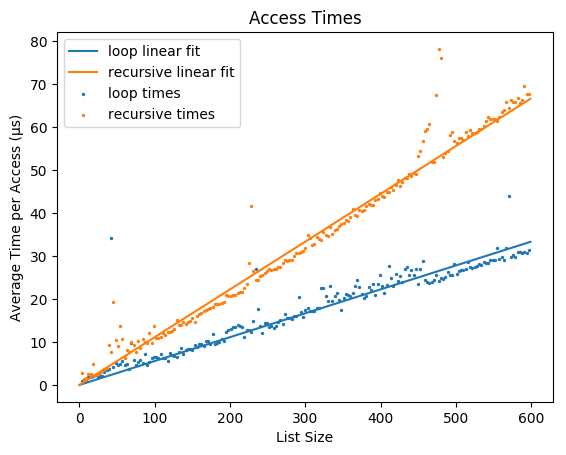

In [101]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

y_pos = objects

plt.scatter(y_pos, loop_performance, 2)
plt.scatter(y_pos, recursive_performance, 2)
plt.plot(range(600), [x/18 for x in range(600)])
plt.plot(range(600), [x/9 for x in range(600)])
plt.legend(["loop linear fit", "recursive linear fit", "loop times", "recursive times"])
plt.ylabel('Average Time per Access (µs)')
plt.xlabel('List Size')
plt.title('Access Times')
 
plt.show()